In [ ]:
# univariate lstm example
from numpy import array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [ ]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
    X, y =[],[]
    for i in range(len(timeseries_data)):
        # find the end of this pattern
        end_ix = i + n_features
        # check if we are beyond the sequence
        if end_ix > len(timeseries_data)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:

# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [ ]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [ ]:
X.shape

(6, 3)

In [ ]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [ ]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 34181.0000
Epoch 2/300
1/1 [==============================] - 0s 29ms/step - loss: 32763.7500
Epoch 3/300
1/1 [==============================] - 0s 35ms/step - loss: 31647.8613
Epoch 4/300
1/1 [==============================] - 0s 26ms/step - loss: 30782.1562
Epoch 5/300
1/1 [==============================] - 0s 25ms/step - loss: 30053.8906
Epoch 6/300
1/1 [==============================] - 0s 29ms/step - loss: 29295.5781
Epoch 7/300
1/1 [==============================] - 0s 29ms/step - loss: 28450.1777
Epoch 8/300
1/1 [==============================] - 0s 30ms/step - loss: 27589.9062
Epoch 9/300
1/1 [==============================] - 0s 30ms/step - loss: 26840.4941
Epoch 10/300
1/1 [==============================] - 0s 31ms/step - loss: 26163.8594
Epoch 11/300
1/1 [==============================] - 0s 31ms/step - loss: 25532.5098
Epoch 12/300
1/1 [==============================] - 0s 36ms/step - loss: 24892.3340
Epo

In [ ]:
# demonstrate prediction for next 10 days
x_input = array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[223.66293]
1 day input [196.         210.         223.66293335]
1 day output [[234.88153]]
2 day input [210.         223.66293335 234.88153076]
2 day output [[248.3711]]
3 day input [223.66293 234.88153 248.3711 ]
3 day output [[261.41132]]
4 day input [234.88153 248.3711  261.41132]
4 day output [[273.88135]]
5 day input [248.3711  261.41132 273.88135]
5 day output [[287.45776]]
6 day input [261.41132 273.88135 287.45776]
6 day output [[300.88928]]
7 day input [273.88135 287.45776 300.88928]
7 day output [[314.40436]]
8 day input [287.45776 300.88928 314.40436]
8 day output [[328.57852]]
9 day input [300.88928 314.40436 328.57852]
9 day output [[342.8697]]
[223.66293, 234.88153, 248.3711, 261.41132, 273.88135, 287.45776, 300.88928, 314.40436, 328.57852, 342.8697]


In [ ]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [ ]:
len(timeseries_data)

9

In [ ]:
lst_output

[223.66293,
 234.88153,
 248.3711,
 261.41132,
 273.88135,
 287.45776,
 300.88928,
 314.40436,
 328.57852,
 342.8697]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

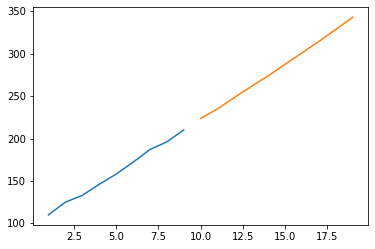

In [ ]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)